In [3]:
#from createDS import dataset
import tensorflow as tf
import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

2023-08-02 23:34:35.572191: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [114]:
from createDS import dataset
asml = dataset('ASML','6mo','OG')
X_train, X_test, y_train, y_test, todays_data = asml.split(1)

In [115]:
X_train

,RSI,AROOND_14,AROONU_14,AROONOSC_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14
Date,,,,,,,,,,
2023-03-24 00:00:00-04:00,0.772829,0.357143,0.928571,0.571429,-0.098428,1.000000,-0.576633,0.750228,0.510603,0.574894
2023-03-27 00:00:00-04:00,0.754030,0.285714,0.857143,0.571429,-0.065131,0.867696,-0.476576,0.708652,0.482101,0.542805
2023-03-28 00:00:00-04:00,0.730177,0.214286,0.785714,0.571429,-0.054240,0.716300,-0.393977,0.653622,0.458712,0.625942
2023-03-29 00:00:00-04:00,0.822159,0.142857,0.714286,0.571429,0.026195,0.736572,-0.309040,0.644074,0.570744,0.564585
2023-03-30 00:00:00-04:00,0.891052,0.071429,1.000000,0.928571,0.153404,0.847888,-0.211268,0.668513,0.640790,0.518354
...,...,...,...,...,...,...,...,...,...,...
2023-07-27 00:00:00-04:00,0.703517,0.642857,0.357143,-0.285714,-0.219604,-0.531402,-0.012314,0.680180,0.604296,0.834582
2023-07-28 00:00:00-04:00,0.745246,0.571429,0.285714,-0.285714,-0.156394,-0.296609,-0.046517,0.637800,0.583307,0.795142
2023-07-31 00:00:00-04:00,0.736485,0.500000,0.214286,-0.285714,-0.112307,-0.147654,-0.063543,0.596252,0.569646,0.764550


In [88]:
y_train[-1:][-1:]

Date
2023-08-03 00:00:00-04:00   -0.048001
Name: Change, dtype: float64

In [112]:
import json
the_model = "LSTM1"
model_dict = json.load(open("my_models/" + the_model + "/" + the_model + ".json"))
X_train, X_test, y_train, y_test, todays_data = dataset(model_dict["data_before_save"]["stock"],model_dict["data_before_save"]["period"],model_dict["data_before_save"]["train_data_name"]).split(1)
#X_train = X_train.loc[model_dict['data_after_save']['date_last_trained']:].iloc[1:] #there will be no data if training data is last from today
#y_train = y_train.loc[model_dict['data_after_save']['date_last_trained']:].iloc[1:]
#last_day_trained_on = str(X_train.iloc[-1]).split("Name:")[-1].split(", ")[0]

In [113]:
X_train

,RSI,AROOND_14,AROONU_14,AROONOSC_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14
Date,,,,,,,,,,
2023-03-24 00:00:00-04:00,0.772829,0.357143,0.928571,0.571429,-0.098428,1.000000,-0.576633,0.750227,0.510602,0.574895
2023-03-27 00:00:00-04:00,0.754030,0.285714,0.857143,0.571429,-0.065131,0.867697,-0.476576,0.708651,0.482101,0.542805
2023-03-28 00:00:00-04:00,0.730176,0.214286,0.785714,0.571429,-0.054240,0.716300,-0.393977,0.653621,0.458712,0.625944
2023-03-29 00:00:00-04:00,0.822159,0.142857,0.714286,0.571429,0.026194,0.736572,-0.309041,0.644073,0.570744,0.564585
2023-03-30 00:00:00-04:00,0.891052,0.071429,1.000000,0.928571,0.153403,0.847889,-0.211268,0.668513,0.640790,0.518355
...,...,...,...,...,...,...,...,...,...,...
2023-07-27 00:00:00-04:00,0.703517,0.642857,0.357143,-0.285714,-0.219604,-0.531402,-0.012314,0.680180,0.604296,0.834582
2023-07-28 00:00:00-04:00,0.745246,0.571429,0.285714,-0.285714,-0.156394,-0.296609,-0.046517,0.637800,0.583307,0.795142
2023-07-31 00:00:00-04:00,0.736485,0.500000,0.214286,-0.285714,-0.112307,-0.147654,-0.063543,0.596252,0.569646,0.764550


In [111]:
#last_day_trained_on = str(X_train.iloc[-1]).split("Name:")[-1].split(", ")[0]
X_train

,RSI,AROOND_14,AROONU_14,AROONOSC_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14
Date,,,,,,,,,,


In [104]:
y_train

Date
2023-03-27 00:00:00-04:00   -0.085958
2023-03-28 00:00:00-04:00   -0.107776
2023-03-29 00:00:00-04:00    0.485287
2023-03-30 00:00:00-04:00    0.426105
2023-03-31 00:00:00-04:00    0.095253
                               ...   
2023-07-28 00:00:00-04:00    0.231512
2023-07-31 00:00:00-04:00   -0.043638
2023-08-01 00:00:00-04:00   -0.135866
2023-08-02 00:00:00-04:00   -0.578864
2023-08-03 00:00:00-04:00   -0.048001
Name: Change, Length: 90, dtype: float64

In [47]:
import pandas as pd
temp = pd.DataFrame(todays_data)
temp['pred'] = 9

In [59]:
temp.to_csv("LSTM25.csv",mode = 'a',header = False)

In [82]:
y_train

Date
2023-03-27 00:00:00-04:00   -0.085958
2023-03-28 00:00:00-04:00   -0.107776
2023-03-29 00:00:00-04:00    0.485287
2023-03-30 00:00:00-04:00    0.426105
2023-03-31 00:00:00-04:00    0.095253
                               ...   
2023-07-03 00:00:00-04:00    0.201484
2023-07-05 00:00:00-04:00   -0.396865
2023-07-06 00:00:00-04:00   -0.365618
2023-07-07 00:00:00-04:00   -0.058780
2023-07-10 00:00:00-04:00    0.300488
Name: Change, Length: 72, dtype: float64

In [74]:
yero = pd.read_csv("my_models/LSTM1/LSTM1.csv")["Prediction"]

In [79]:
x_cord = [i for i in range(len(yero))]

1

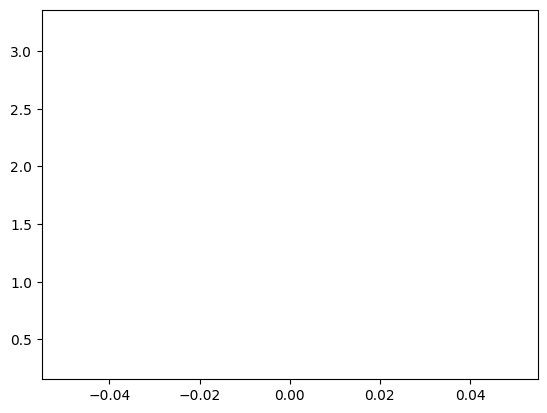

In [81]:
plt.plot(x_cord,yero,label = "pred")
plt.plot(x_cord,y_train[-len(yero):], label = "real")
plt.show()

In [67]:
lol = yero["pred"][:-1]

In [68]:
len(lol)

2

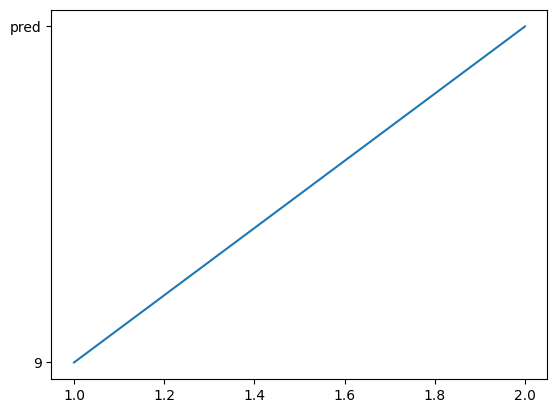

In [72]:
x_cord = [1,2]
plt.plot(x_cord,lol)
#plt.plot(x_cord,y_train[-len(lol):])
plt.show()

In [70]:
y_train[-len(lol):]

Date
2023-07-07 00:00:00-04:00   -0.058780
2023-07-10 00:00:00-04:00    0.300488
Name: Change, dtype: float64

In [53]:
new_df = pd.read_csv("LSTM25.csv")
#pd.concat(new_df,temp).to_csv("LSTM25.csv")

EmptyDataError: No columns to parse from file

In [94]:
X_train, X_test, y_train, y_test = asml.split(1)
len(X_test)

0

In [101]:
X_train.iloc[-1:,1:]

,AROOND_14,AROONU_14,AROONOSC_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14
Date,,,,,,,,,
2023-08-01 00:00:00-04:00,0.428571,0.142857,-0.285714,-0.098973,-0.081528,-0.074107,0.567599,0.549724,0.787241


In [60]:
thing = str(X_train.iloc[0]).split("Name:")[-1].split(", ")[0]
thing

' 2023-03-06 00:00:00-05:00'

In [69]:
def create_record(optimizer,loss,epochs,batch_size,stock,period,train_data_name,train_data,start_data,end_data,num_train_points):
    train_before_save = {"optimizer":optimizer,"loss":loss,"epochs":epochs,"batch_size":batch_size}
    data_before_save = {"stock":stock,"period":period,"train_data_name":train_data_name,"train_data":train_data,"start_data":start_data,"end_data":end_data,"num_train_points":num_train_points}
    data_after_save = {"date_last_trained":"tbd","updated_data_len":"tbd"}
    big_dict = {"train_before_save":train_before_save,"data_before_save":data_before_save,"data_after_save":data_after_save}
    return big_dict


In [70]:
optimizer = "adam"
loss = "mean_squared_error"
epochs = 2400
batch_size = 8

stock = asml.ticker
period = asml.period
train_data_name = asml.indicators_keyword
train_data = list(X_train.columns.values)
start_data = str(X_train.iloc[0]).split("Name:")[-1].split(", ")[0]
end_data = str(X_train.iloc[-1]).split("Name:")[-1].split(", ")[0]
num_train_points = len(X_train)

yes = create_record(optimizer,loss,epochs,batch_size,stock,period,train_data_name,train_data,start_data,end_data,num_train_points)

In [16]:
import json
dick = json.load(open("my_models/LSTM1/LSTM1.json"))
dick

{'train_before_save': {'optimizer': 'adam',
  'loss': 'mean_squared_error',
  'epochs': 2400,
  'batch_size': 8},
 'data_before_save': {'stock': 'ASML',
  'period': '6mo',
  'train_data_name': 'OG',
  'train_data': ['RSI',
   'AROOND_14',
   'AROONU_14',
   'AROONOSC_14',
   'MACD_12_26_9',
   'MACDh_12_26_9',
   'MACDs_12_26_9',
   'ADX_14',
   'DMP_14',
   'DMN_14'],
  'start_data': ' 2023-03-06 00:00:00-05:00',
  'end_data': ' 2023-06-15 00:00:00-04:00',
  'num_train_points': 72},
 'data_after_save': {'date_last_trained': 'tbd', 'updated_data_len': 0}}

In [17]:
dick['data_after_save']['date_last_trained'] = 'test'

In [18]:
dick = json.load(open("my_models/LSTM1/LSTM1.json"))
dick['data_after_save']['date_last_trained'] = 'test2'
with open("my_models/LSTM1/LSTM1.json","w") as outfile:
    json.dump(dick,outfile,indent = 6)

In [98]:
X_train.loc[dick['data_before_save']['end_data']:].iloc[1:]

,RSI,AROOND_14,AROONU_14,AROONOSC_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14
Date,,,,,,,,,,
2023-06-16 00:00:00-04:00,0.812365,0.428571,0.071429,-0.357143,0.793434,-0.104037,0.983707,0.996844,0.566618,0.451914
2023-06-20 00:00:00-04:00,0.802412,0.357143,0.000000,-0.357143,0.722549,-0.212510,0.956386,0.963308,0.531659,0.530273
2023-06-21 00:00:00-04:00,0.717932,0.285714,0.785714,0.500000,0.610467,-0.374420,0.908249,0.914889,0.495504,0.558962
2023-06-22 00:00:00-04:00,0.774886,1.000000,0.714286,-0.285714,0.552952,-0.404431,0.856253,0.856660,0.457974,0.567441
2023-06-23 00:00:00-04:00,0.663893,1.000000,0.642857,-0.357143,0.429659,-0.548405,0.785747,0.800915,0.416059,0.564342
2023-06-26 00:00:00-04:00,0.677792,0.928571,0.571429,-0.357143,0.336825,-0.608033,0.707575,0.772207,0.493053,0.525244
2023-06-27 00:00:00-04:00,0.806435,0.857143,0.500000,-0.357143,0.351787,-0.459138,0.648545,0.774460,0.541678,0.468361
2023-06-28 00:00:00-04:00,0.801122,0.785714,0.428571,-0.357143,0.356222,-0.359223,0.602362,0.783671,0.540678,0.443534
2023-06-29 00:00:00-04:00,0.795793,0.714286,0.357143,-0.357143,0.352541,-0.294091,0.564552,0.792222,0.522358,0.428506


In [73]:
import json
with open("/Users/michael.rowe/Personal/IntrinsicValueProject/my_models/LSTM1.json","w") as outfile:
    json.dump(yes,outfile,indent = 6)

In [51]:
my_dict = {"model_summary":model.summary()}
type(my_dict["model_summary"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

NoneType

In [34]:
print(X_train.iloc[0,])
#X_train[1]

RSI              0.601039
AROOND_14        0.857143
AROONU_14        0.071429
AROONOSC_14     -0.785714
MACD_12_26_9    -0.576905
MACDh_12_26_9   -0.141819
MACDs_12_26_9   -0.622538
ADX_14           0.559205
DMP_14           0.448482
DMN_14           0.817533
Name: 2023-03-06 00:00:00-05:00, dtype: float64


In [7]:
y_test

Date
2023-06-20 00:00:00-04:00   -0.032570
2023-06-21 00:00:00-04:00   -0.291058
2023-06-22 00:00:00-04:00    0.228615
2023-06-23 00:00:00-04:00   -0.435180
2023-06-26 00:00:00-04:00    0.053856
2023-06-27 00:00:00-04:00    0.567365
2023-06-28 00:00:00-04:00   -0.019632
2023-06-29 00:00:00-04:00   -0.018552
2023-06-30 00:00:00-04:00    0.030956
2023-07-03 00:00:00-04:00    0.201484
2023-07-05 00:00:00-04:00   -0.396865
2023-07-06 00:00:00-04:00   -0.365618
2023-07-07 00:00:00-04:00   -0.058779
2023-07-10 00:00:00-04:00    0.300488
2023-07-11 00:00:00-04:00   -0.108831
2023-07-12 00:00:00-04:00    0.450554
2023-07-13 00:00:00-04:00    0.571041
2023-07-14 00:00:00-04:00    0.069879
Name: Change, dtype: float64

In [10]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(rate = 0.2))

##add 2nd lstm layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))
##add 3rd lstm layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))
##add 4th lstm layer
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(rate = 0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Give a summary
model.summary()

model.fit(x = X_train, y = y_train, batch_size = 8, epochs = 1000)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [10]:
model.save('saved_models/LSTM1_OG_6mo_1600epochs')

INFO:tensorflow:Assets written to: saved_models/LSTM1_OG_6mo_1600epochs/assets


INFO:tensorflow:Assets written to: saved_models/LSTM1_OG_6mo_1600epochs/assets


In [11]:
new_model = tf.keras.models.load_model('saved_models/LSTM1_OG_6mo_1600epochs')

new_model.fit(X_train, y_train,batch_size =8,epochs = 800)

pred = new_model.predict(X_test)
pred

Epoch 1/800
9/9 [==============================] - 7s 17ms/step - loss: 5678.6201
Epoch 2/800
9/9 [==============================] - 0s 14ms/step - loss: 3756.1279
Epoch 3/800
9/9 [==============================] - 0s 15ms/step - loss: 4567.7300
Epoch 4/800
9/9 [==============================] - 0s 13ms/step - loss: 4422.2588
Epoch 5/800
9/9 [==============================] - 0s 12ms/step - loss: 5573.4053
Epoch 6/800
9/9 [==============================] - 0s 12ms/step - loss: 4452.3252
Epoch 7/800
9/9 [==============================] - 0s 13ms/step - loss: 5011.1250
Epoch 8/800
9/9 [==============================] - 0s 13ms/step - loss: 5137.4673
Epoch 9/800
9/9 [==============================] - 0s 13ms/step - loss: 6431.4868
Epoch 10/800
9/9 [==============================] - 0s 12ms/step - loss: 5106.6064
Epoch 11/800
9/9 [==============================] - 0s 12ms/step - loss: 5108.2432
Epoch 12/800
9/9 [==============================] - 0s 14ms/step - loss: 4479.7427
Epoch 13/800


array([[679.45374],
       [679.4544 ],
       [648.0017 ],
       [642.2272 ],
       [650.3828 ],
       [643.6883 ],
       [640.9834 ],
       [639.9559 ],
       [640.92554],
       [641.92615],
       [642.81946],
       [643.9334 ],
       [645.9117 ],
       [645.6644 ],
       [639.56836],
       [634.32526],
       [641.6925 ],
       [639.71216]], dtype=float32)

1/1 [==============================] - 1s 1s/step


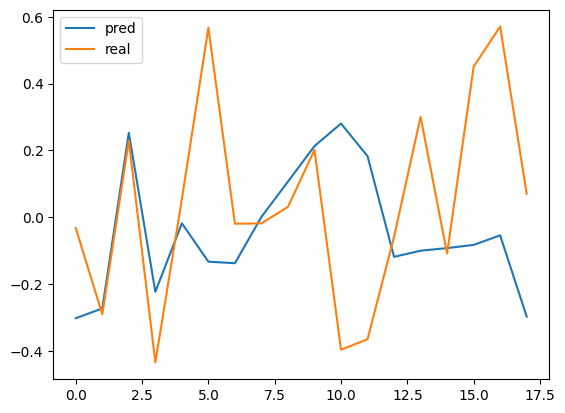

array([[-0.30265787],
       [-0.27341402],
       [ 0.25235394],
       [-0.22370179],
       [-0.0184022 ],
       [-0.13328731],
       [-0.1379007 ],
       [ 0.00080981],
       [ 0.1065328 ],
       [ 0.21288168],
       [ 0.2802987 ],
       [ 0.18274526],
       [-0.11879547],
       [-0.10044943],
       [-0.09258781],
       [-0.08315116],
       [-0.05447555],
       [-0.2977045 ]], dtype=float32)

In [11]:
pred = model.predict(X_test)
x_cord = [i for i in range(len(pred))]
plt.plot(x_cord,pred,label = "pred")
plt.plot(x_cord,y_test, label = "real")
plt.legend()
plt.show()
pred

In [103]:
y_train

Date
2023-03-24 00:00:00-04:00   -0.400473
2023-03-27 00:00:00-04:00   -0.085958
2023-03-28 00:00:00-04:00   -0.107776
2023-03-29 00:00:00-04:00    0.485287
2023-03-30 00:00:00-04:00    0.426105
                               ...   
2023-07-27 00:00:00-04:00    0.556740
2023-07-28 00:00:00-04:00    0.231512
2023-07-31 00:00:00-04:00   -0.043638
2023-08-01 00:00:00-04:00   -0.135866
2023-08-02 00:00:00-04:00   -0.578864
Name: Change, Length: 90, dtype: float64

In [14]:
new_model.save('LSTM1_OG_6mo_2400epochs.keras')

In [7]:
X_train[-5:]
y_train[-5:]

Date
2023-06-30 00:00:00-04:00    0.030956
2023-07-03 00:00:00-04:00    0.201484
2023-07-05 00:00:00-04:00   -0.396865
2023-07-06 00:00:00-04:00   -0.365618
2023-07-07 00:00:00-04:00   -0.058780
Name: Change, dtype: float64

In [8]:
loaded_model = tf.keras.models.load_model("my_models/LSTM1/LSTM1.keras")
trained_model = loaded_model.fit(X_train[-5:],y_train[-5:], batch_size =1, epochs = 1)

5/5 [==============================] - 5s 15ms/step - loss: 353475.3125


In [14]:
trained_model.history

{'loss': [353475.3125]}

In [11]:
loaded_model2 = tf.keras.models.load_model("my_models/LSTM1/LSTM1.keras")

In [21]:
import pandas as pd
predtoday = loaded_model2.predict(todays_data)

1/1 [==============================] - 0s 49ms/step


In [36]:
frame = pd.DataFrame(todays_data)
frame["Prediction"] = predtoday
newframe = pd.concat([frame,todays_data])

In [37]:
todays_data_with_pred = todays_data
todays_data_with_pred["Prediction"] = predtoday

In [40]:
todays_data

,RSI,AROOND_14,AROONU_14,AROONOSC_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,Prediction
Date,,,,,,,,,,,
2023-08-02 00:00:00-04:00,0.604758,0.357143,0.071429,-0.285714,-0.18207,-0.216773,-0.101976,0.578666,0.495594,0.93426,631.104858


In [33]:
newframe

,RSI,AROOND_14,AROONU_14,AROONOSC_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,Prediction
Date,,,,,,,,,,,
2023-08-02 00:00:00-04:00,0.604758,0.357143,0.071429,-0.285714,-0.18207,-0.216773,-0.101976,0.578666,0.495594,0.93426,631.104858
2023-08-02 00:00:00-04:00,0.604758,0.357143,0.071429,-0.285714,-0.18207,-0.216773,-0.101976,0.578666,0.495594,0.93426,NaN


In [16]:
new_model2 = tf.keras.models.load_model('LSTM1_OG_6mo_2400epochs.keras')
pred = new_model2.predict(X_test)
pred

1/1 [==============================] - 2s 2s/step


array([[679.45374],
       [679.4544 ],
       [648.0017 ],
       [642.2272 ],
       [650.3828 ],
       [643.6883 ],
       [640.9834 ],
       [639.9559 ],
       [640.92554],
       [641.92615],
       [642.81946],
       [643.9334 ],
       [645.9117 ],
       [645.6644 ],
       [639.56836],
       [634.32526],
       [641.6925 ],
       [639.71216]], dtype=float32)

In [104]:
model.predict(X_test)

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.